In [1]:
#Required Libraries
# !pip install graphviz
# !pip install seaborn
# !pip install pydotplus
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
from sklearn.svm import SVC
from sklearn import  datasets
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz 
import seaborn as sns
from IPython.display import Image  
import pydotplus
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm
import pandas
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas
from sklearn.utils import shuffle
from sklearn import svm
import xgboost as xgb
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from xgboost import XGBClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
from pandas.api.types import CategoricalDtype 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve,GridSearchCV


In [2]:
np.random.seed(50)
df = pandas.read_csv('generated.csv')
df2 = pandas.read_csv('Train.csv')
df = pd.concat([df,df2])
testing1= pandas.read_csv('Val.csv')
testing2= pandas.read_csv('Test.csv')

In [3]:
algorithm=[]
f1_test1=[]
f1_test2=[]

In [4]:
X = df
y = X.attack
X = X.drop(['attack'],axis=1)

In [5]:
X_test1 = testing1
y_test1 = X_test1.attack
X_test1 = X_test1.drop(['attack'],axis=1)

In [6]:
X_test2 = testing2
y_test2 = X_test2.attack
X_test2 = X_test2.drop(['attack'],axis=1)

# DT

In [7]:
classifier = DecisionTreeClassifier()
depth_range = list(range(5, 20))
#param_grid_dt = dict(max_depth=depth_range)
param = {'max_depth': depth_range}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

0.9993077336710294
{'max_depth': 15}
DecisionTreeClassifier(max_depth=15)


DecisionTreeClassifier(max_depth=15)

In [8]:
algorithm.append('DT')

F1 score : -> 0.9988061737869873

Classification Report for DT : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11309
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     23035
   macro avg       1.00      1.00      1.00     23035
weighted avg       1.00      1.00      1.00     23035


Confusion Matrix  :
 [[11294    15]
 [   13 11713]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


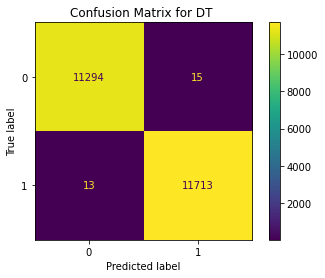

In [9]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for DT : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for DT ")
f1_test1.append(Score)

F1 score : -> 0.8701124349723108

Classification Report for DT : 

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      9711
           1       0.94      0.81      0.87     12833

    accuracy                           0.86     22544
   macro avg       0.86      0.87      0.86     22544
weighted avg       0.88      0.86      0.86     22544


Confusion Matrix  :
 [[ 9078   633]
 [ 2463 10370]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


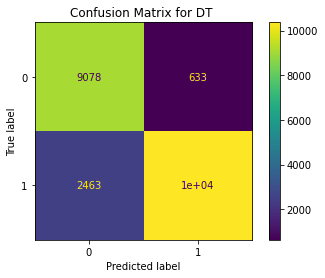

In [10]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for DT : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for DT ")
f1_test2.append(Score)

# Random Forest

In [11]:
classifier = RandomForestClassifier()
#param_grid_dt = dict(max_depth=depth_range)
param = {
    'n_estimators': [10, 30, 50, 80, 100, 200]
    #'n_estimators': [80]
}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

0.9996929048016815
{'n_estimators': 200}
RandomForestClassifier(n_estimators=200)


RandomForestClassifier(n_estimators=200)

In [12]:
algorithm.append('RF')

F1 score : -> 0.9994030868934936

Classification Report for RF : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11309
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     23035
   macro avg       1.00      1.00      1.00     23035
weighted avg       1.00      1.00      1.00     23035


Confusion Matrix  :
 [[11301     8]
 [    6 11720]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


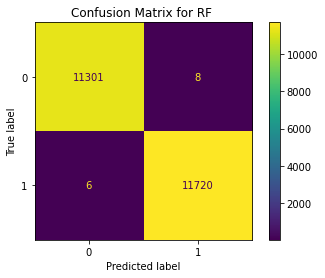

In [13]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for RF : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for RF ")
f1_test1.append(Score)

F1 score : -> 0.8358442915614387

Classification Report for RF : 

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      9711
           1       0.95      0.75      0.84     12833

    accuracy                           0.83     22544
   macro avg       0.84      0.85      0.83     22544
weighted avg       0.86      0.83      0.83     22544


Confusion Matrix  :
 [[9176  535]
 [3235 9598]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


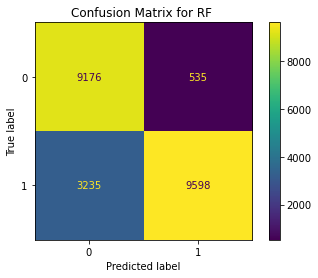

In [14]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for RF : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for RF ")
f1_test2.append(Score)

# KNN

In [15]:
classifier = KNeighborsClassifier()
#param_grid_dt = dict(max_depth=depth_range)
param = {
    'n_neighbors': list(range(1, 4))
    #'n_neighbors': [1]
}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

0.9994274486733536
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


KNeighborsClassifier(n_neighbors=1)

In [16]:
algorithm.append('KNN')

F1 score : -> 0.9990619936897758

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11309
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     23035
   macro avg       1.00      1.00      1.00     23035
weighted avg       1.00      1.00      1.00     23035


Confusion Matrix  :
 [[11297    12]
 [   10 11716]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


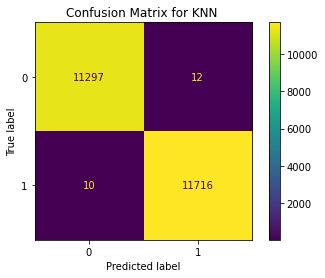

In [17]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for KNN ")
f1_test1.append(Score)

F1 score : -> 0.8950324315772821

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      9711
           1       0.91      0.88      0.90     12833

    accuracy                           0.88     22544
   macro avg       0.88      0.88      0.88     22544
weighted avg       0.88      0.88      0.88     22544


Confusion Matrix  :
 [[ 8575  1136]
 [ 1518 11315]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


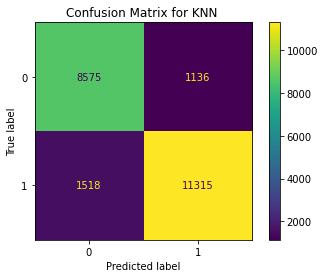

In [18]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for KNN ")
f1_test2.append(Score)

# Logistic Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

classifier = LogisticRegression()
#param_grid_dt = dict(max_depth=depth_range)
param = {
    'solver': ['lbfgs'],'penalty':[ 'l1', 'l2', 'elasticnet']
    #'solver': ['lbfgs'],'penalty':['l2']
}
grid = GridSearchCV(classifier, param, cv=10, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9831317948448017
{'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
algorithm.append('LR')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


F1 score : -> 0.9658733915737833

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11309
           1       0.97      0.96      0.97     11726

    accuracy                           0.97     23035
   macro avg       0.97      0.97      0.97     23035
weighted avg       0.97      0.97      0.97     23035


Confusion Matrix  :
 [[11020   289]
 [  504 11222]]


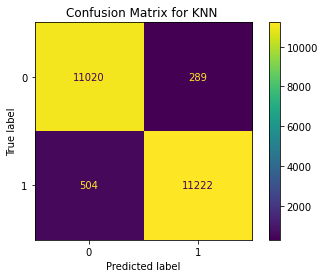

In [21]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for KNN ")
f1_test1.append(Score)

F1 score : -> 0.7912791452178052

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      9711
           1       0.89      0.71      0.79     12833

    accuracy                           0.79     22544
   macro avg       0.79      0.80      0.79     22544
weighted avg       0.81      0.79      0.79     22544


Confusion Matrix  :
 [[8573 1138]
 [3687 9146]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


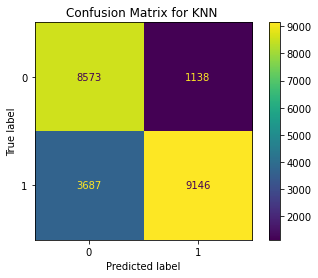

In [22]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for KNN ")
f1_test2.append(Score)

# XGboost

In [24]:
classifier = XGBClassifier(learning_rate=0.02, n_estimators=600, use_label_encoder=False,eval_metric='logloss')
param = {
    'max_depth': [2, 4, 5]
    #'max_depth': [5]
}
grid = GridSearchCV(classifier, param, cv=5, scoring='f1_macro')
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X, y)

0.9995055290878063
{'max_depth': 5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [25]:
algorithm.append('XGboost')

F1 score : -> 0.999275084218157

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11309
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     23035
   macro avg       1.00      1.00      1.00     23035
weighted avg       1.00      1.00      1.00     23035


Confusion Matrix  :
 [[11301     8]
 [    9 11717]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


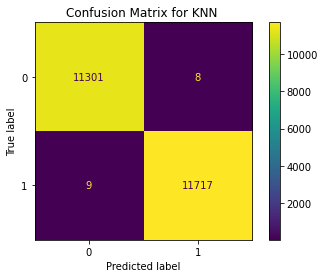

In [26]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for KNN ")
f1_test1.append(Score)

F1 score : -> 0.8321455117834813

Classification Report for KNN : 

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      9711
           1       0.95      0.74      0.83     12833

    accuracy                           0.83     22544
   macro avg       0.84      0.84      0.83     22544
weighted avg       0.86      0.83      0.83     22544


Confusion Matrix  :
 [[9189  522]
 [3317 9516]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


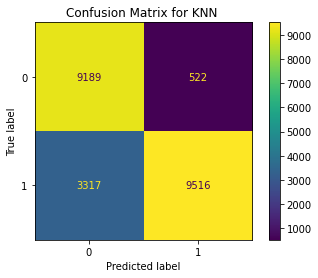

In [27]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for KNN : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for KNN ")
f1_test2.append(Score)

# Majority Voting

In [28]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('DT', DecisionTreeClassifier(max_depth=16)))
models.append(('XGBoost', XGBClassifier(learning_rate=0.02, n_estimators=600, use_label_encoder=False, eval_metric='logloss', max_depth= 5)))

In [29]:
model = VotingClassifier(estimators=models, voting='soft')
model.fit(X,y)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=1)),
                             ('DT', DecisionTreeClassifier(max_depth=16)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='logloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.02,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
     

In [30]:
algorithm.append('Ensemble')

F1 score : -> 0.9996588777076582

Classification Report for Ensemble : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11309
           1       1.00      1.00      1.00     11726

    accuracy                           1.00     23035
   macro avg       1.00      1.00      1.00     23035
weighted avg       1.00      1.00      1.00     23035


Confusion Matrix  :
 [[11305     4]
 [    4 11722]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


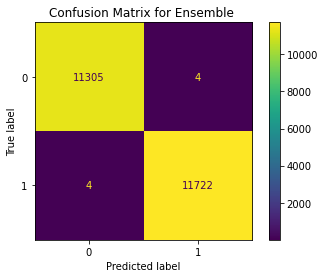

In [31]:
y_pred=model.predict(X_test1)
Score= f1_score(y_test1,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for Ensemble : \n\n{classification_report(y_test1, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test1,y_pred))
plot_confusion_matrix(model ,X_test1 ,y_test1)
plt.title("Confusion Matrix for Ensemble ")
f1_test1.append(Score)

F1 score : -> 0.8749111287691856

Classification Report for Ensemble : 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      9711
           1       0.94      0.82      0.87     12833

    accuracy                           0.87     22544
   macro avg       0.87      0.88      0.87     22544
weighted avg       0.88      0.87      0.87     22544


Confusion Matrix  :
 [[ 9093   618]
 [ 2373 10460]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


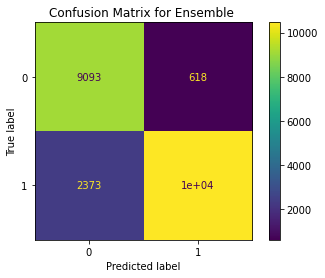

In [32]:
y_pred = model.predict(X_test2)
Score = f1_score(y_test2,y_pred)
print("F1 score : ->",Score)
print(f"\nClassification Report for Ensemble : \n\n{classification_report(y_test2, y_pred)}")
print("\nConfusion Matrix  :\n",confusion_matrix(y_test2,y_pred))
plot_confusion_matrix(model ,X_test2 ,y_test2)
plt.title("Confusion Matrix for Ensemble ")
f1_test2.append(Score)

# Results

In [33]:
for i in range(0, len(algorithm)):
    f1_test1[i] = round(f1_test1[i], 3)
    f1_test2[i] = round(f1_test2[i], 3)

In [34]:
f1_test2

[0.87, 0.836, 0.895, 0.791, 0.832, 0.875]

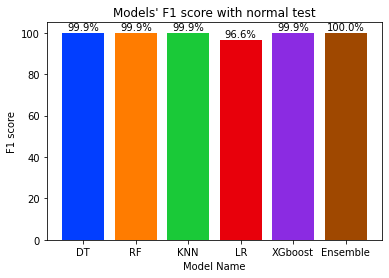

In [35]:
x1 = algorithm
y1 = [round(num, 3)*100 for num in f1_test1] 
plt.title("Models' F1 score with normal test")
plt.xlabel('Model Name')
plt.ylabel("F1 score")
colors = sns.color_palette("bright")
plot = plt.bar(x1,y1,color=colors)
for value in plot:
    height = value.get_height()
    height =float(f'{height:.3f}')
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%s' % (height)+'%', ha='center', va='bottom')
    

plt.show()

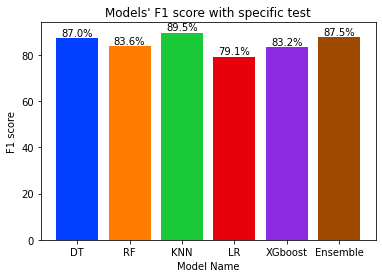

In [36]:
x1 = algorithm
y2 = [round(num, 3)*100 for num in f1_test2] 
plt.title("Models' F1 score with specific test")
plt.xlabel('Model Name')
plt.ylabel("F1 score")
colors = sns.color_palette("bright")
plot = plt.bar(x1,y2,color=colors)
for value in plot:
    height = value.get_height()
    height =float(f'{height:.3f}')
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%s' % (height)+'%', ha='center', va='bottom')
    

plt.show()

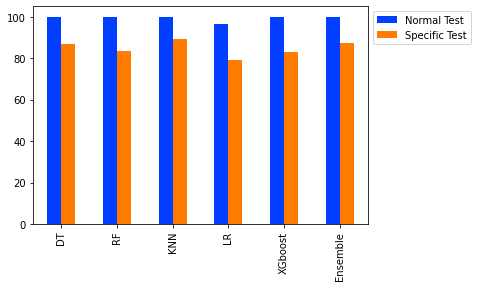

In [37]:
fig, ax = plt.subplots()

plotdata = pd.DataFrame(
    {"Normal Test": y1,"Specific Test": y2}, 
    index=algorithm)
# Plot a bar chart
plotdata.plot(kind="bar",ax=ax,color=colors)
ax.legend(["Normal Test", "Specific Test"]);

plt.legend(bbox_to_anchor=(1.0, 1.0))

In [42]:
print(algorithm)
print(y1)
print(y2)

['DT', 'RF', 'KNN', 'LR', 'XGboost', 'Ensemble']
[99.9, 99.9, 99.9, 96.6, 99.9, 100.0]
[87.0, 83.6, 89.5, 79.10000000000001, 83.2, 87.5]
